**Oasis Infobyte**

**Batch - August Batch**

**Data Science Internship**

**Task 3: Car Price Precition**

**Intern Name: Soumalya Bhattacharyya**

**CAR PRICE PREDICTION**

**We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.**

Car_ID : Unique id of each observation (Interger)

Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.

CarCompany : Name of car company (Categorical)

Fueltype : Car fuel type i.e gas or diesel (Categorical)

Aspiration : Aspiration used in a car (Categorical)

Doornumber : Number of doors in a car (Categorical)

Carbody : body of car (Categorical)

Drivewheel : type of drive wheel (Categorical)

Eginelocation : Location of car engine (Categorical)

Wheelbase : Weelbase of car (Numeric)

Carlength : Length of car (Numeric)

Carwidth : Width of car (Numeric)

Carheight : height of car (Numeric)

Curbweight : The weight of a car without occupants or baggage. (Numeric)

Enginetype : Type of engine. (Categorical)

Cylindernumber : cylinder placed in the car (Categorical)

Enginesize : Size of car (Numeric)

Fuelsystem : Fuel system of car (Categorical)

Boreratio : Boreratio of car (Numeric)

Stroke : Stroke or volume inside the engine (Numeric)

Compressionratio : compression ratio of car (Numeric)

Horsepower : Horsepower (Numeric)

Peakrpm : car peak rpm (Numeric)

Citympg : Mileage in city (Numeric)

Highwaympg : Mileage on highway (Numeric)

Price(Dependent variable) : Price of car (Numeric)

**Importing the Libraries**

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

#For Visualising the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import scipy.stats as stats
sns.set(style='darkgrid')
sns.set_color_codes()
# plt.style.use('fivethirtyeight') 

#Linear regression
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import metrics

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

**Car Price Prediction with Machine Learning**

Car price prediction using machine learning is a common application of regression algorithms. In order to predict car prices, you would typically need a dataset that includes information about various car features, such as make, model, year, mileage, engine size, fuel type, transmission type, and other relevant characteristics.

**Steps to build a machine learning model for car price prediction:**

**Data Collection:** Collect the car data needed to build the machine learning model. This may include scraping websites, purchasing datasets, or collecting data from dealerships.

**Data Preparation:** Pre-process the data to ensure that it is in a format that can be used for analysis. This includes cleaning the data, removing duplicates, dealing with missing values, and encoding categorical variables.

**Feature Selection:** Identify which features are most relevant to predicting car prices. We can use techniques such as correlation analysis, feature importance analysis, or domain knowledge to identify the most important features.

**Model Selection:** Choose a regression algorithm that is best suited for our dataset.

**Model Training:** Train the machine learning model on the dataset using the selected algorithm.

**Model Evaluation:** Evaluate the performance of the model using metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared.

**Reading the Dataset**

In [2]:
#Reading and loading the dataset from csv file to pandas
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Display the first five rows of the dataset
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
#Display the last five rows of the dataset
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
200   sedan        rwd          front      109.1      188.8      68.9   
201   sedan        rwd          front      109.1      188.8      68.8   
202   sedan        rwd          front      109.1      188.8      68.9   
203   sedan        rwd          front      109.1      188.8      68.9   
204   sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0

In [5]:
#Preview of the dataset
df.sample(10)

car_ID  symboling             CarName fueltype aspiration doornumber  \
30       31          2         honda civic      gas        std        two   
70       71         -1       buick skyhawk   diesel      turbo       four   
54       55          1    mazda glc deluxe      gas        std       four   
200     201         -1     volvo 145e (sw)      gas        std       four   
89       90          1        Nissan versa      gas        std        two   
13       14          0              bmw x3      gas        std       four   
0         1          3  alfa-romero giulia      gas        std        two   
137     138          2            saab 99e      gas      turbo       four   
174     175         -1    toyota celica gt   diesel      turbo       four   
75       76          1      mercury cougar      gas      turbo        two   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
30     hatchback        fwd          front       86.6      144.6      63.9   
70         sedan        rwd          front      115.6      202.6      71.7   
54         sedan        fwd          front       93.1      166.8      64.2   
200        sedan        rwd          front      109.1      188.8      68.9   
89         sedan        fwd          front       94.5      165.3      63.8   
13         sedan        rwd          front      101.2      176.8      64.8   
0    convertible        rwd          front       88.6      168.8      64.1   
137        sedan        fwd          front       99.1      186.6      66.5   
174        sedan        fwd          front      102.4      175.6      66.5   
75     hatchback        rwd          front      102.7      178.4      68.0   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
30        50.8        1713        ohc           four          92       1bbl   
70        56.3        3770        ohc           five         183        idi   
54        54.1        1950        ohc           four          91       2bbl   
200       55.5        2952        ohc           four         141       mpfi   
89        54.5        1889        ohc           four          97       2bbl   
13        54.3        2765        ohc            six         164       mpfi   
0         48.8        2548       dohc           four         130       mpfi   
137       56.1        2847       dohc           four         121       mpfi   
174       54.9        2480        ohc           four         110        idi   
75        54.8        2910        ohc           four         140       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
30        2.91    3.41               9.6          58     4800       49   
70        3.58    3.64              21.5         123     4350       22   
54        3.08    3.15               9.0          68     5000       31   
200       3.78    3.15               9.5         114     5400       23   
89        3.15    3.29               9.4          69     5200       31   
13        3.31    3.19               9.0         121     4250       21   
0         3.47    2.68               9.0         111     5000       21   
137       3.54    3.07               9.0         160     5500       19   
174       3.27    3.35              22.5          73     4500       30   
75        3.78    3.12               8.0         175     5000       19   

     highwaympg    price  
30           54   6479.0  
70           25  31600.0  
54           38   7395.0  
200          28  16845.0  
89           37   5499.0  
13           28  21105.0  
0            27  13495.0  
137          26  18620.0  
174          33  10698.0  
75           24  16503.0

**Basic Understanding of Data**

In [6]:
#Check the shape of the dataset
df.shape

(205, 26)

In [7]:
#Check the size of the dataset
df.size

5330

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

**Exploratory Data Analysis**

In [9]:
#Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Identify columns in Dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
#Descriptive statistical summary of numerical features
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [12]:
df.describe(include = ['object'])

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

In [13]:
#Check the data types of the columns
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
#Showing Only Categorical Features.
df.select_dtypes(include="object").head()

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi

In [15]:
#Showing Only Numerical Features.
df.select_dtypes(include=["int","float"]).head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

**Data Preprocessing**

In [16]:
#Checking for missing or null value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
#Check for duplicates
df.duplicated().sum()

0

In [18]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [19]:
#Dropping unwanted Columns from data
df.drop(columns=['car_ID'],axis=1,inplace=True)

In [20]:
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

**Data Visualization**

In [21]:
#Checking correlation
df.corr()

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

<Axes: >

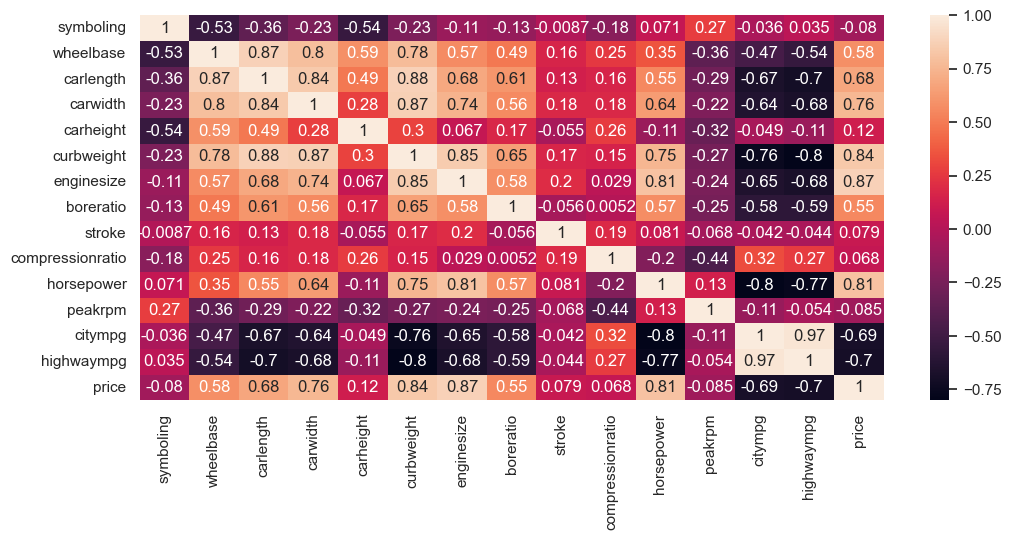

In [22]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)

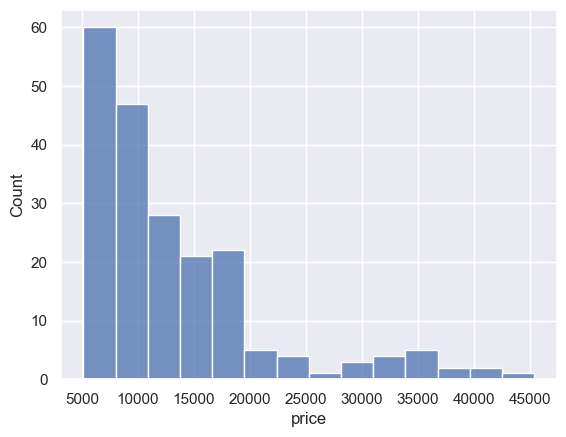

In [23]:
# Check the distribution of the target variable
sns.histplot(df['price'])
plt.show()

Text(0.5, 1.0, 'Car Price Distribution Plot')

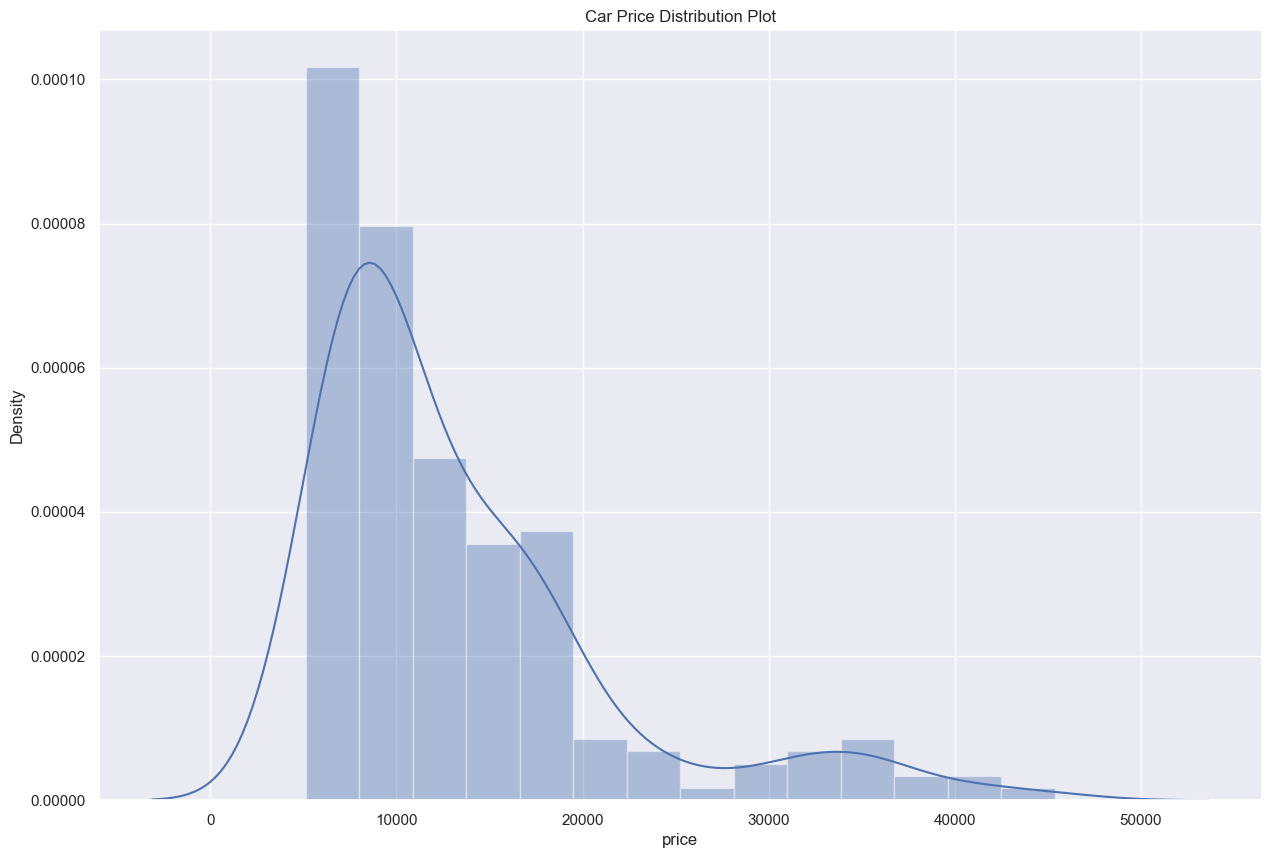

In [24]:
plt.figure(figsize=[15,10])
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

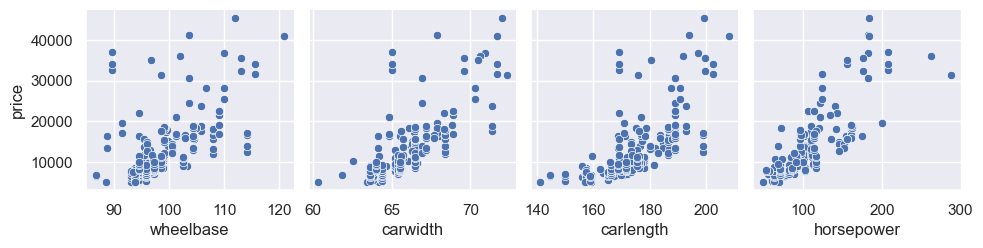

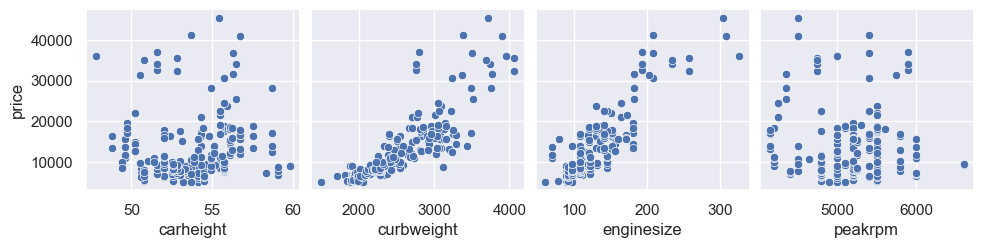

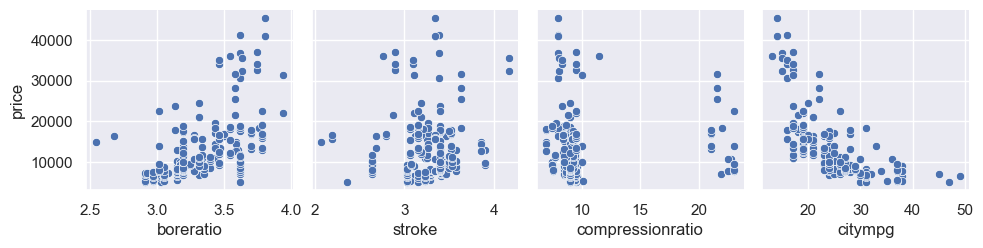

In [25]:
sns.pairplot(x_vars = ['wheelbase','carwidth','carlength','horsepower'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['carheight','curbweight','enginesize','peakrpm'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['boreratio','stroke','compressionratio','citympg'],y_vars = ['price'],data = df)

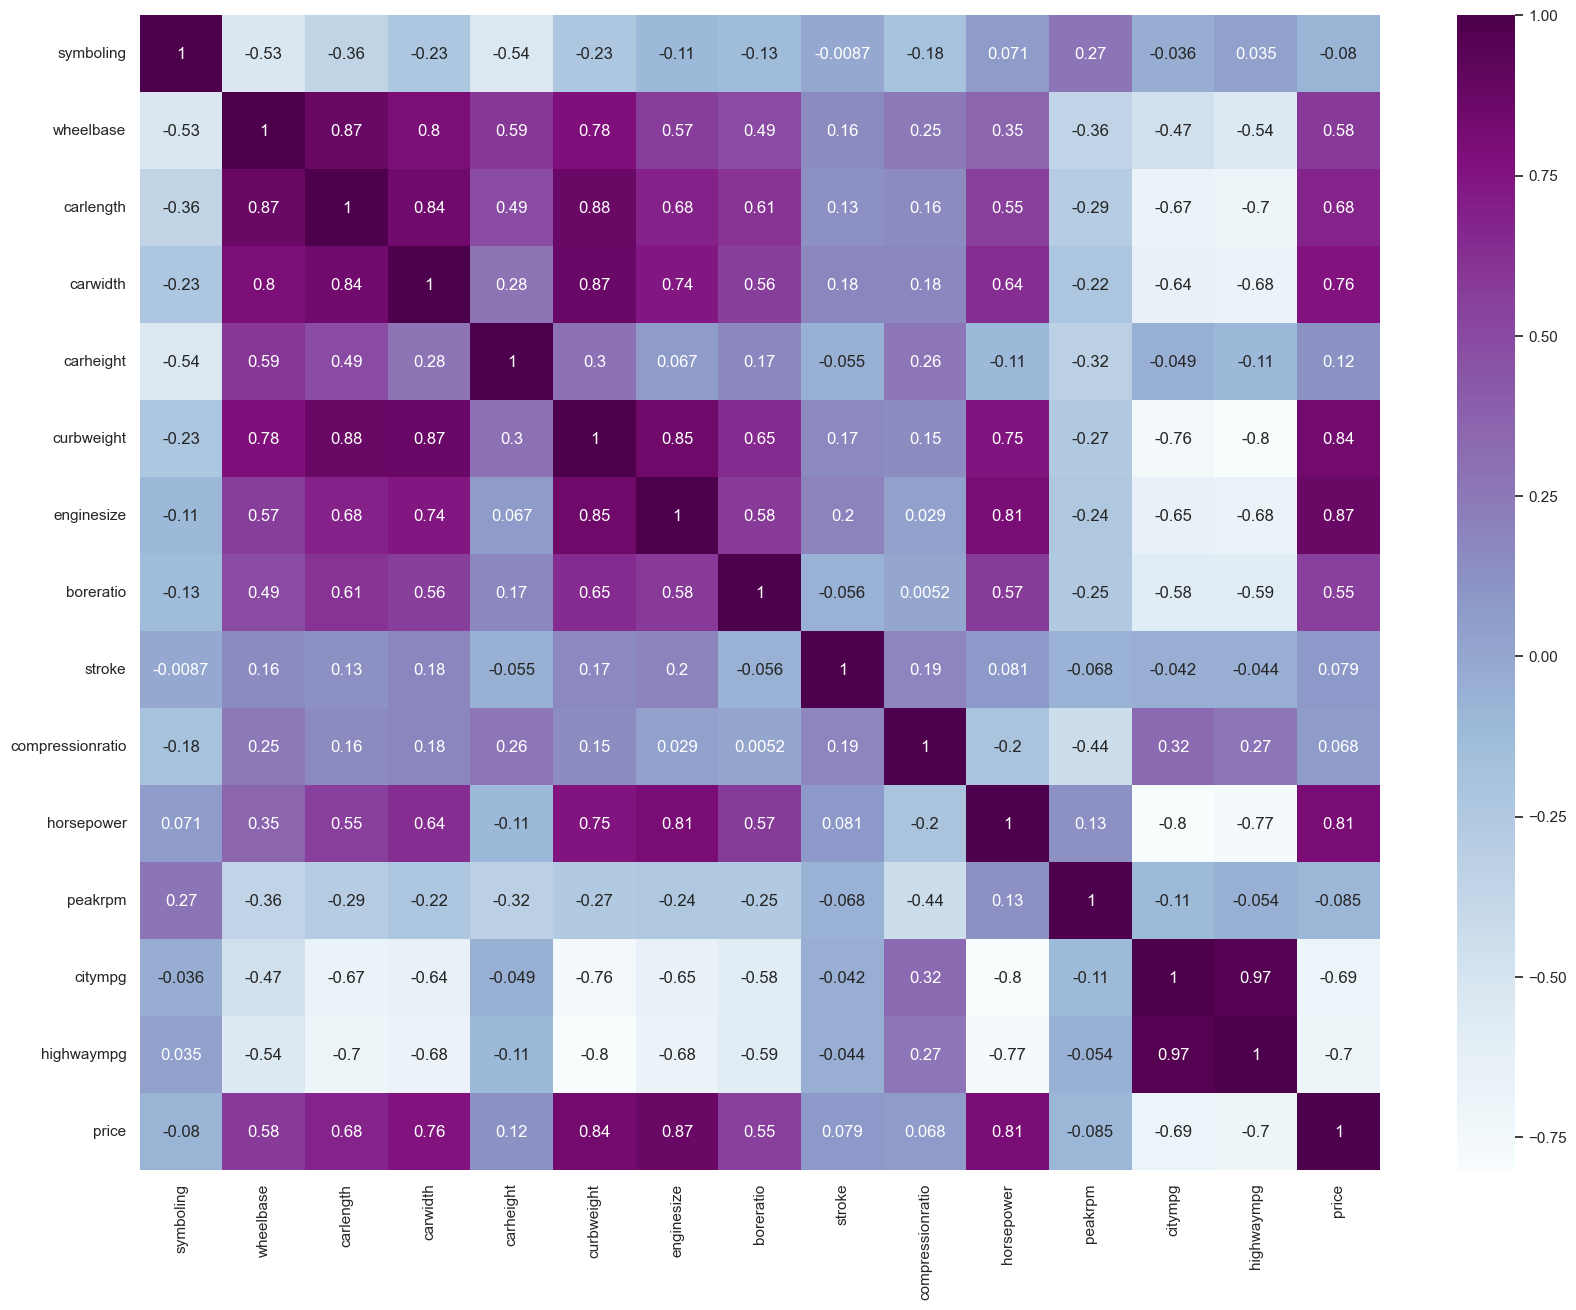

In [26]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

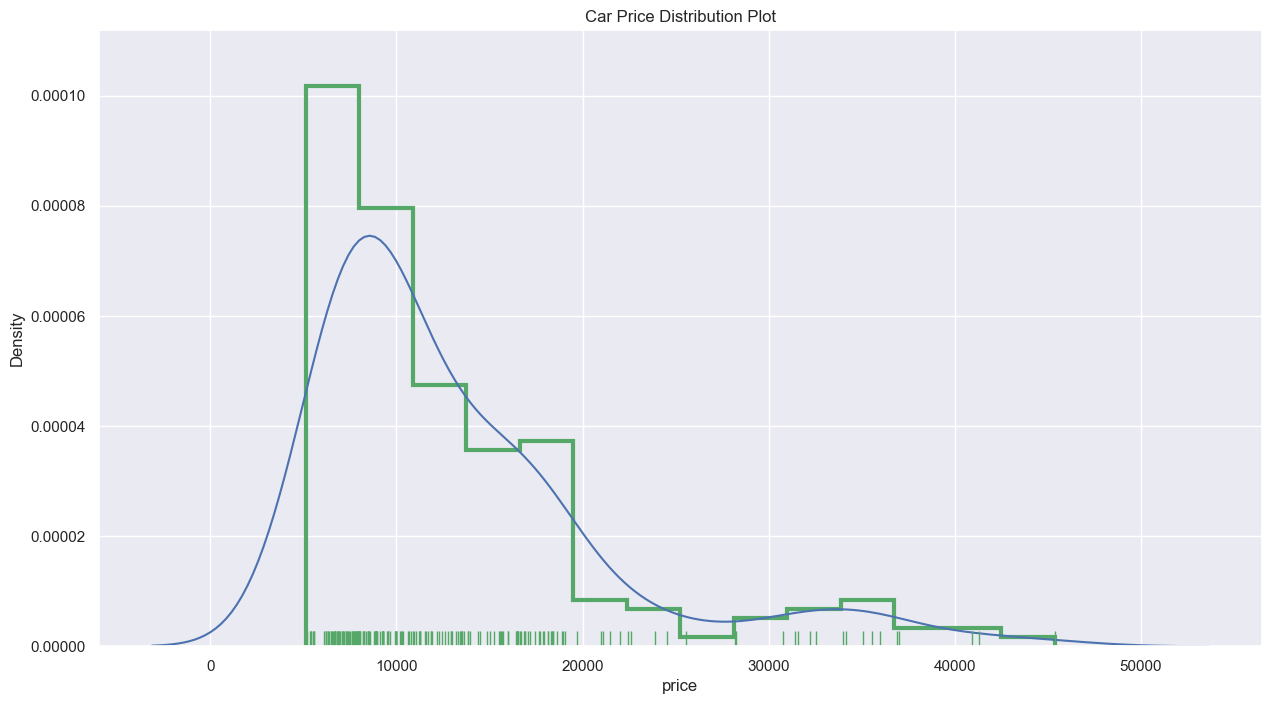

In [27]:
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(df.price, rug=True, rug_kws={"color": "g"},
            hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

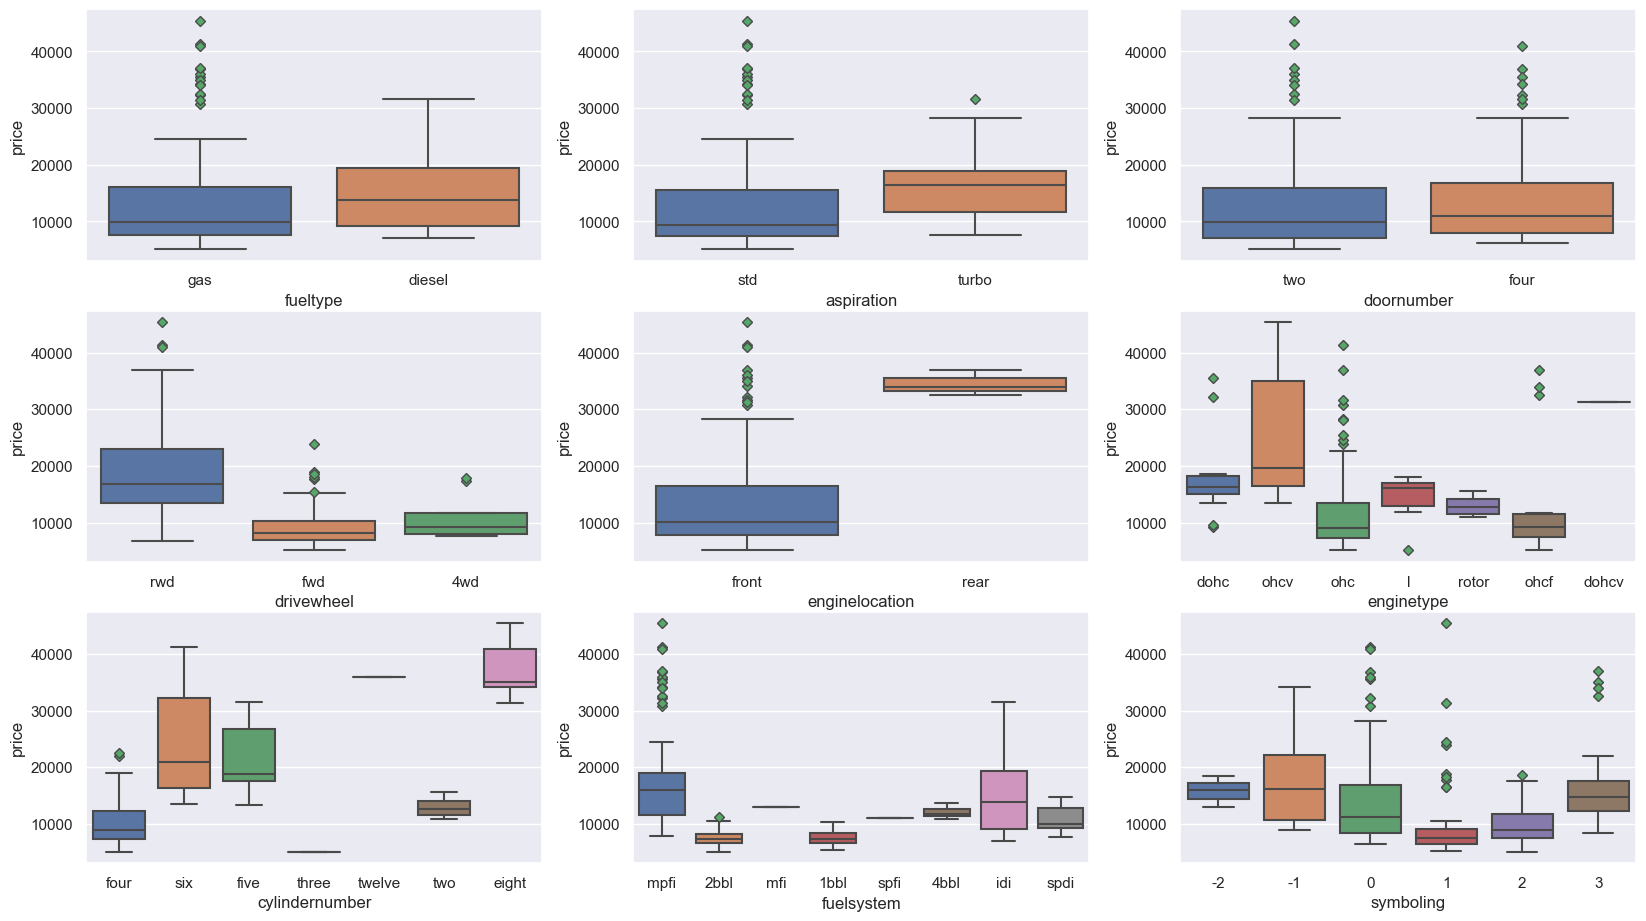

In [28]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(4,3, 1)
sns.boxplot(y='price', x='fueltype', data= df, flierprops=green_diamond)

plt.subplot(4,3, 2)
sns.boxplot(y='price', x='aspiration', data= df, flierprops=green_diamond)

plt.subplot(4,3, 3)
sns.boxplot(y='price', x='doornumber', data= df, flierprops=green_diamond)

plt.subplot(4,3, 4)
sns.boxplot(y='price', x='drivewheel', data= df, flierprops=green_diamond)

plt.subplot(4,3, 5)
sns.boxplot(y='price', x='enginelocation', data= df, flierprops=green_diamond)

plt.subplot(4,3, 6)
sns.boxplot(y='price', x='enginetype', data= df, flierprops=green_diamond)

plt.subplot(4,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= df, flierprops=green_diamond)

plt.subplot(4,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= df, flierprops=green_diamond)

plt.subplot(4,3, 9)
sns.boxplot(y='price', x='symboling', data= df, flierprops=green_diamond)

plt.show()

<Axes: >

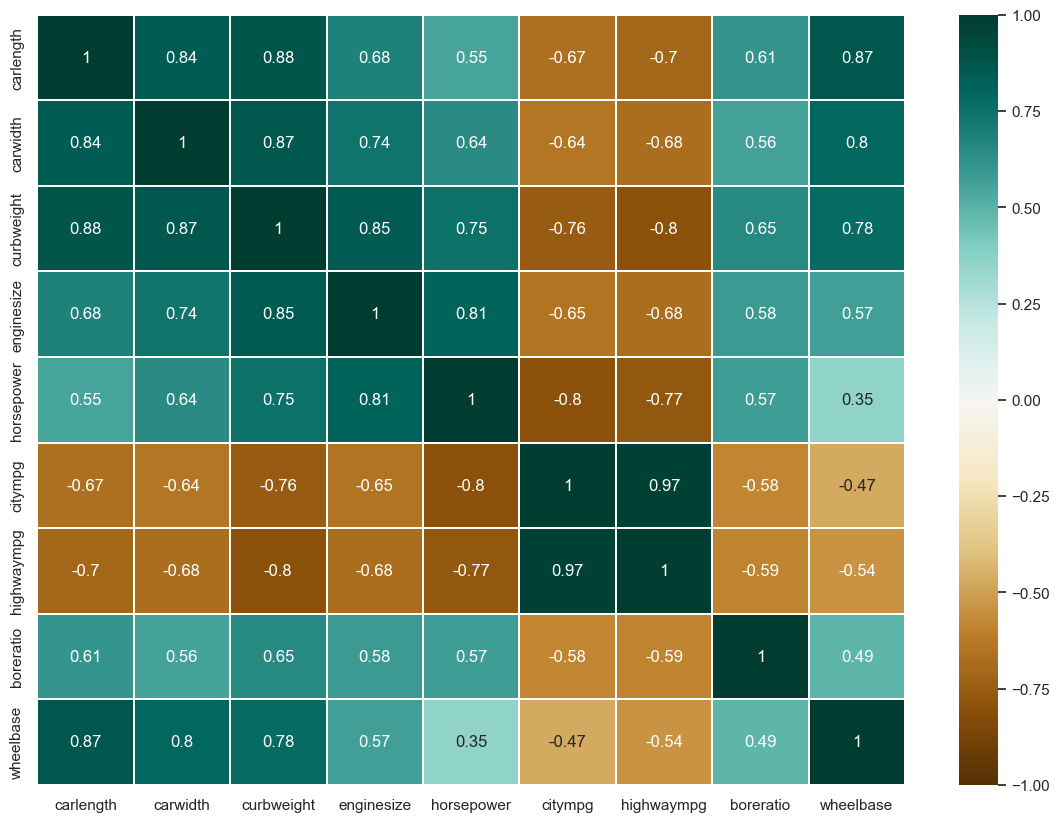

In [29]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(df[num_features].corr(), annot = True, cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
# cmap = 'Blues'

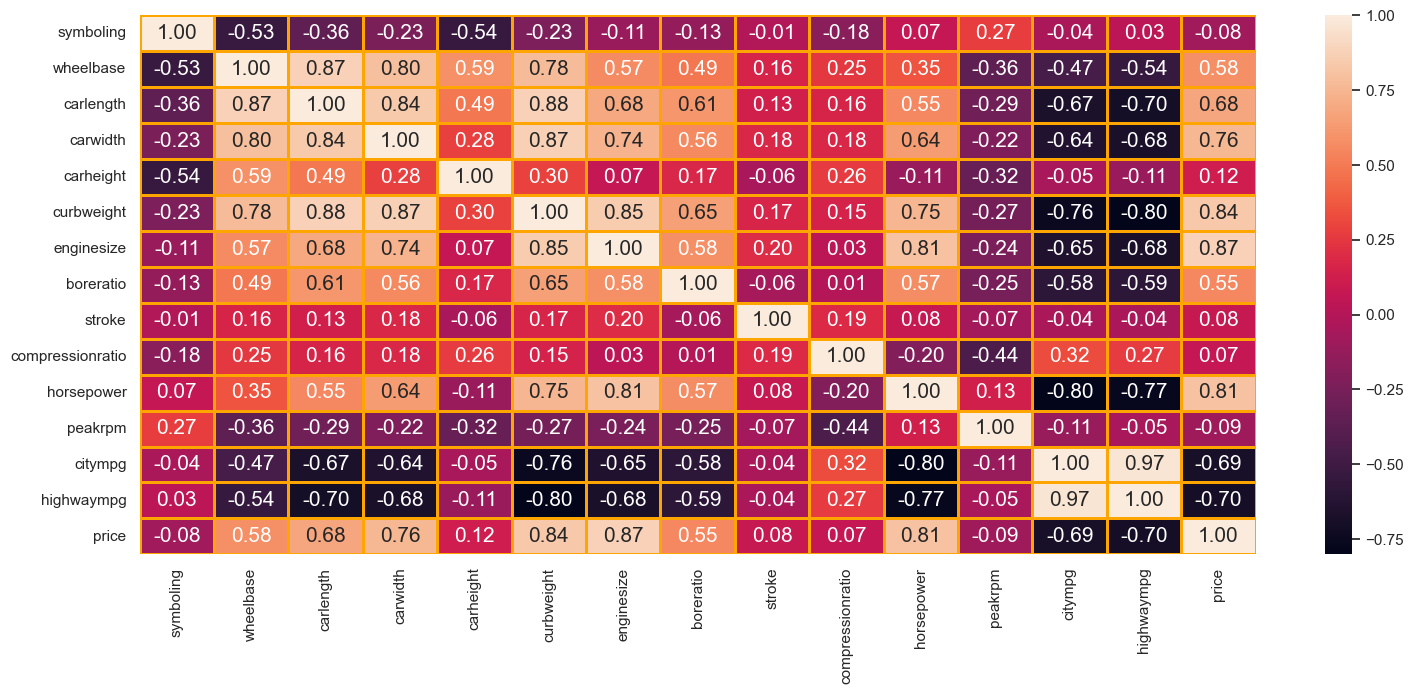

In [30]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

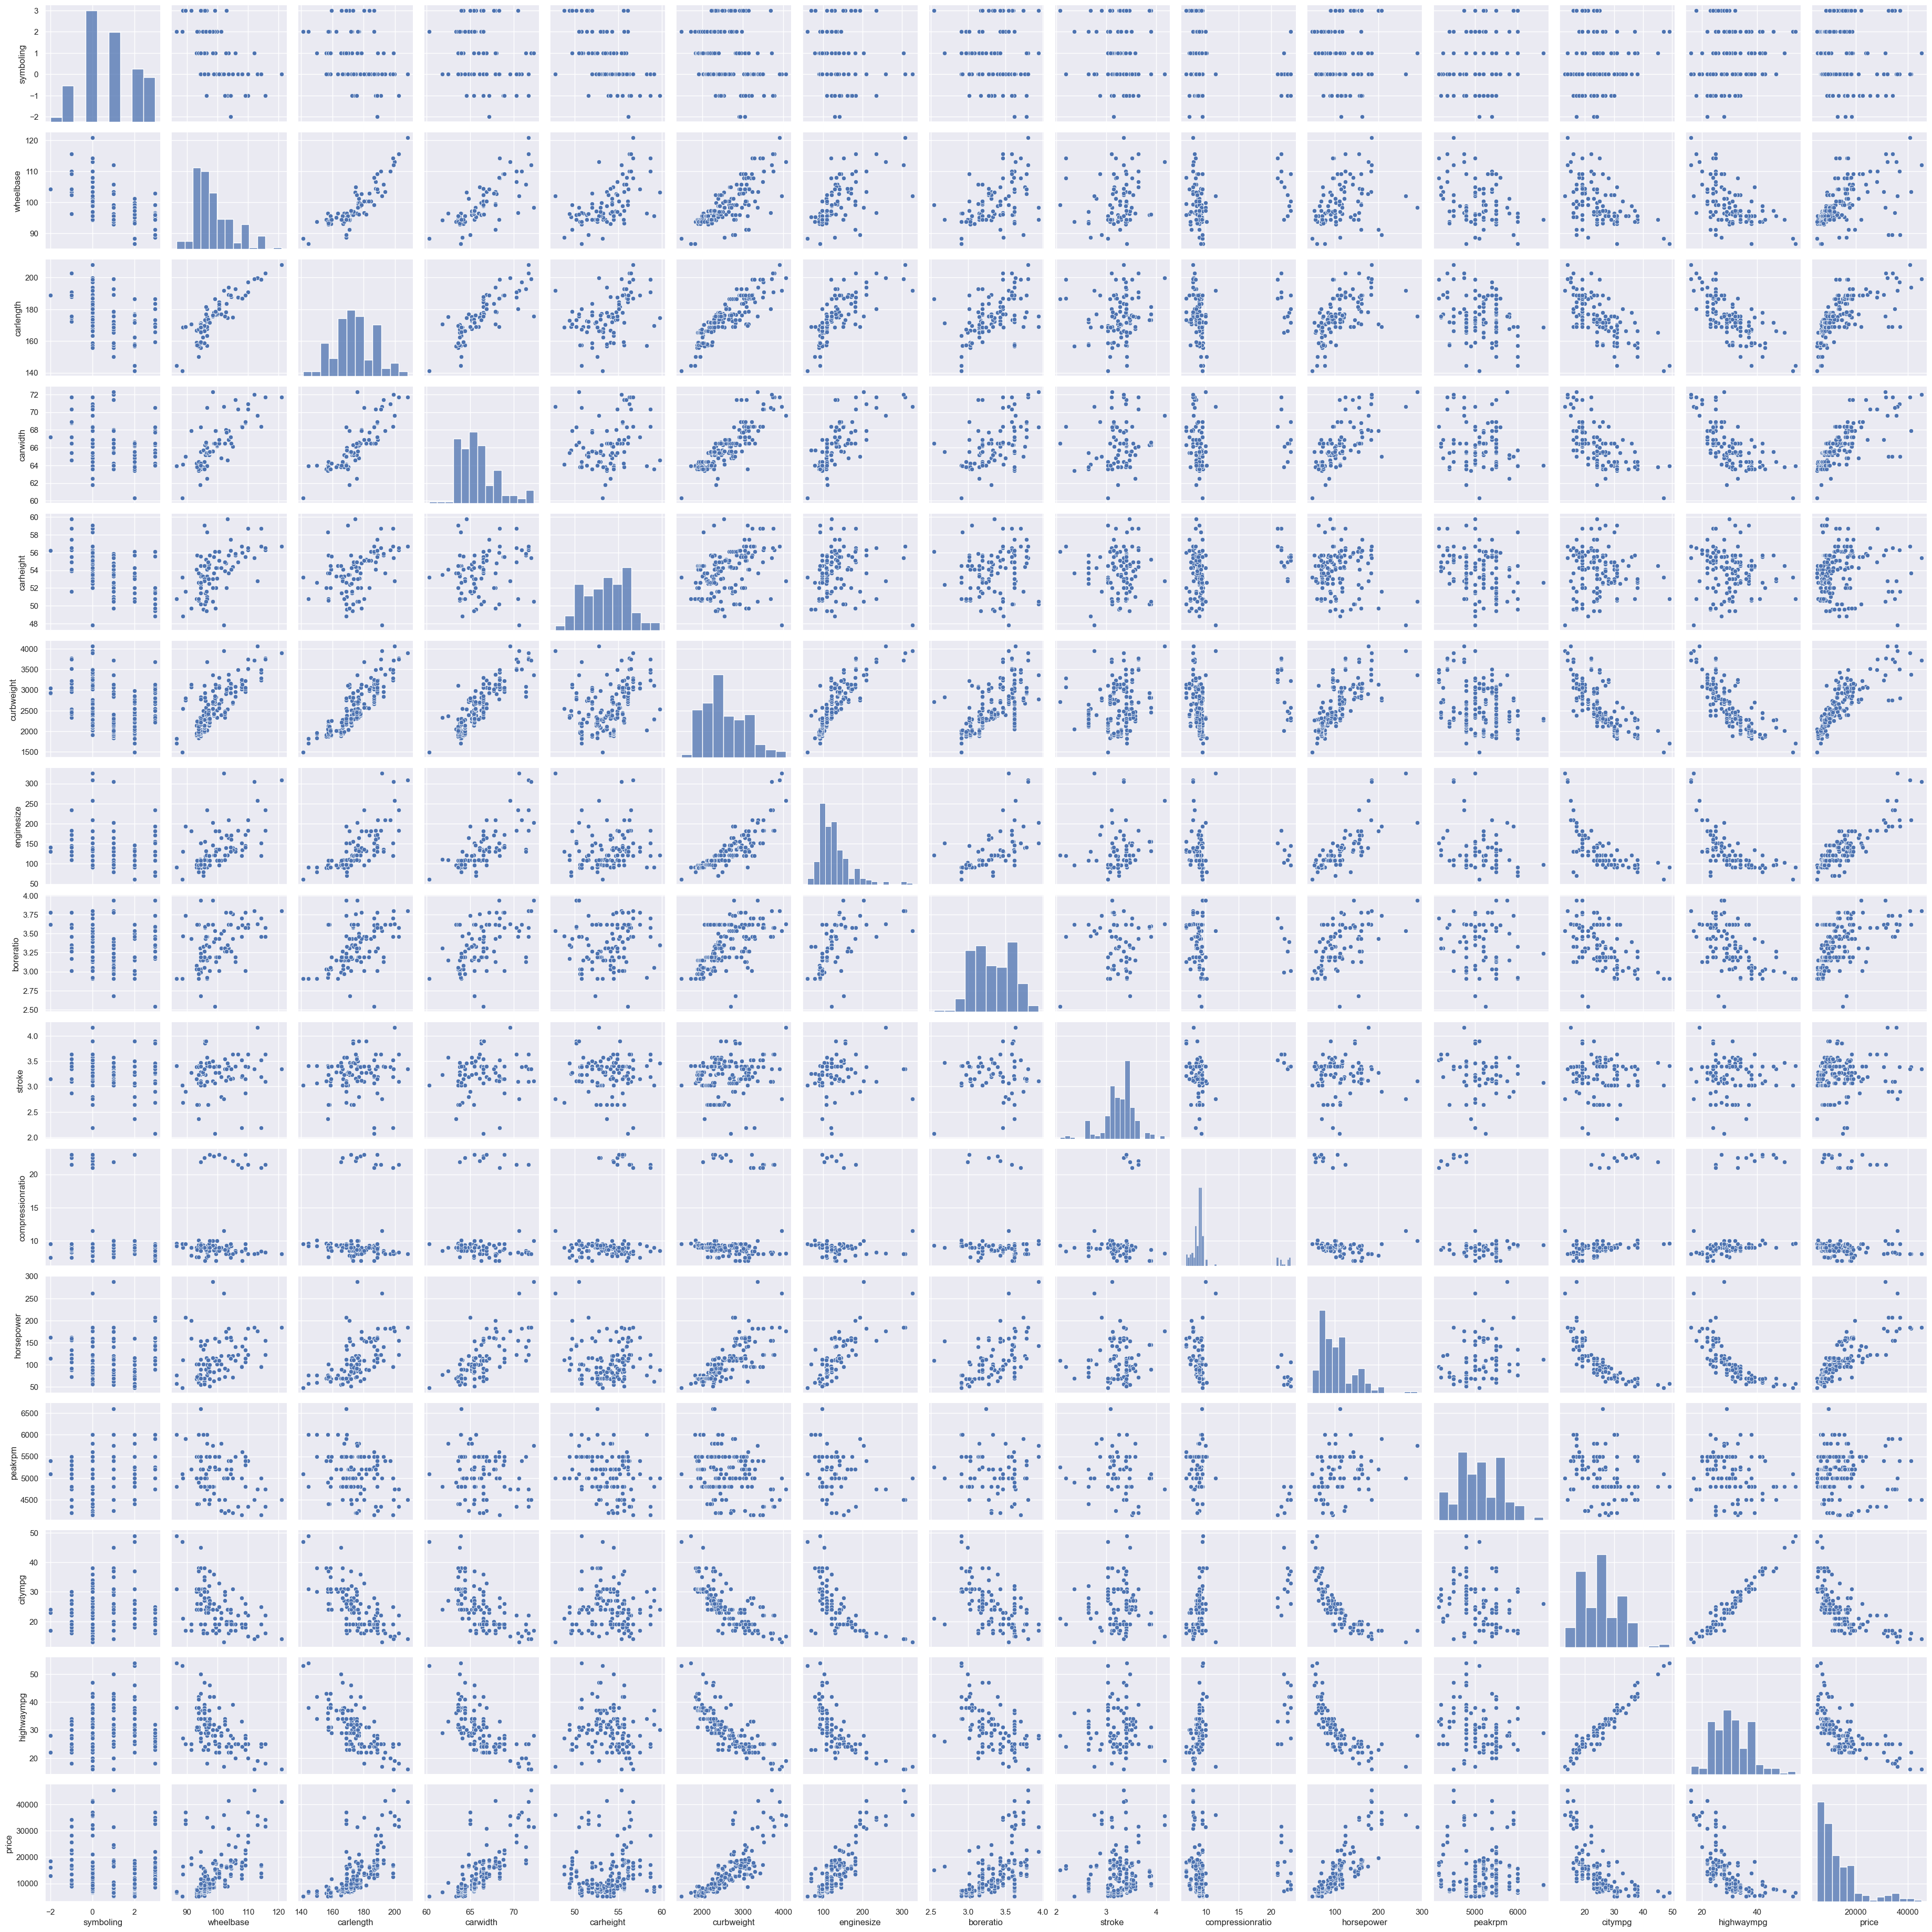

In [31]:
sns.pairplot(df)
plt.show()

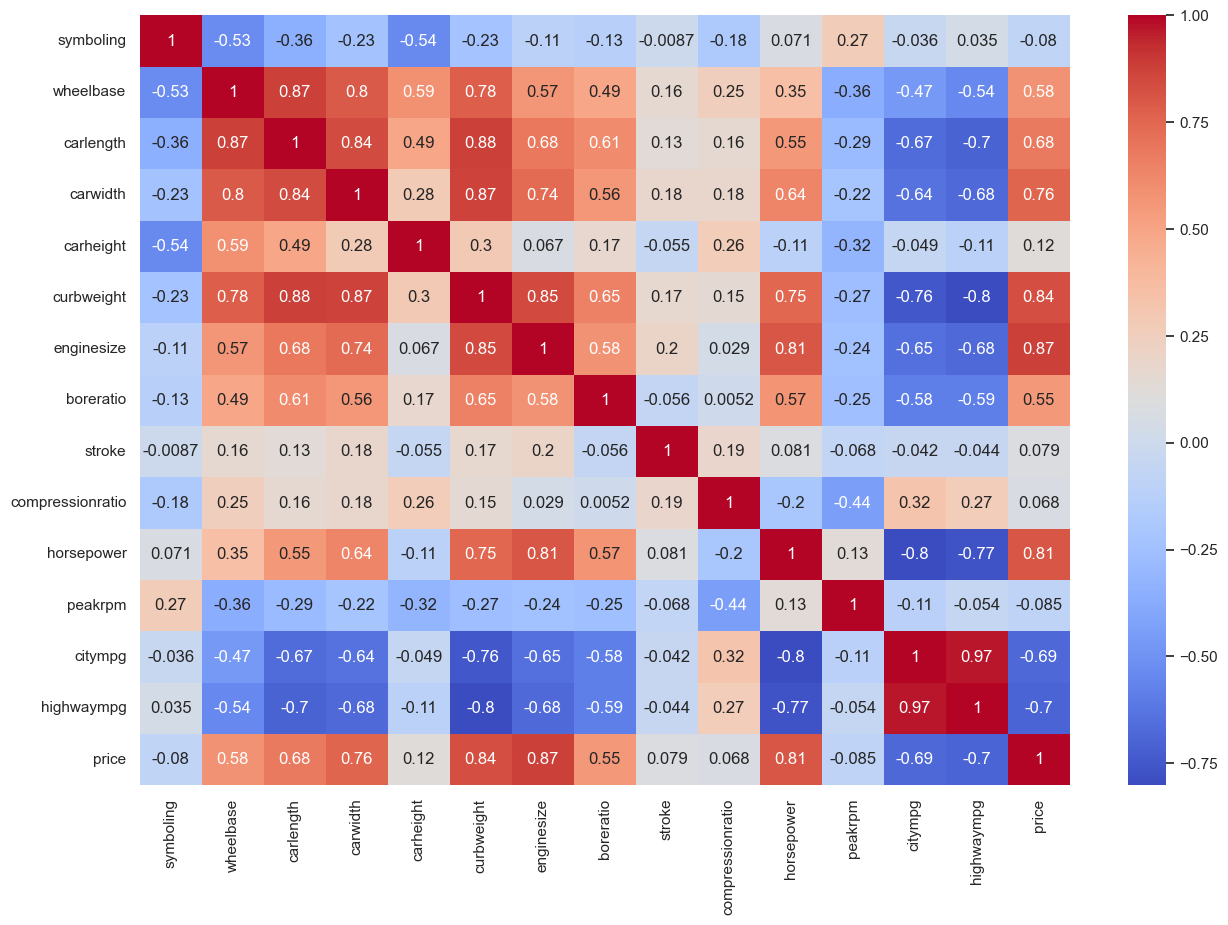

In [32]:
plt.figure(figsize=(15,10))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

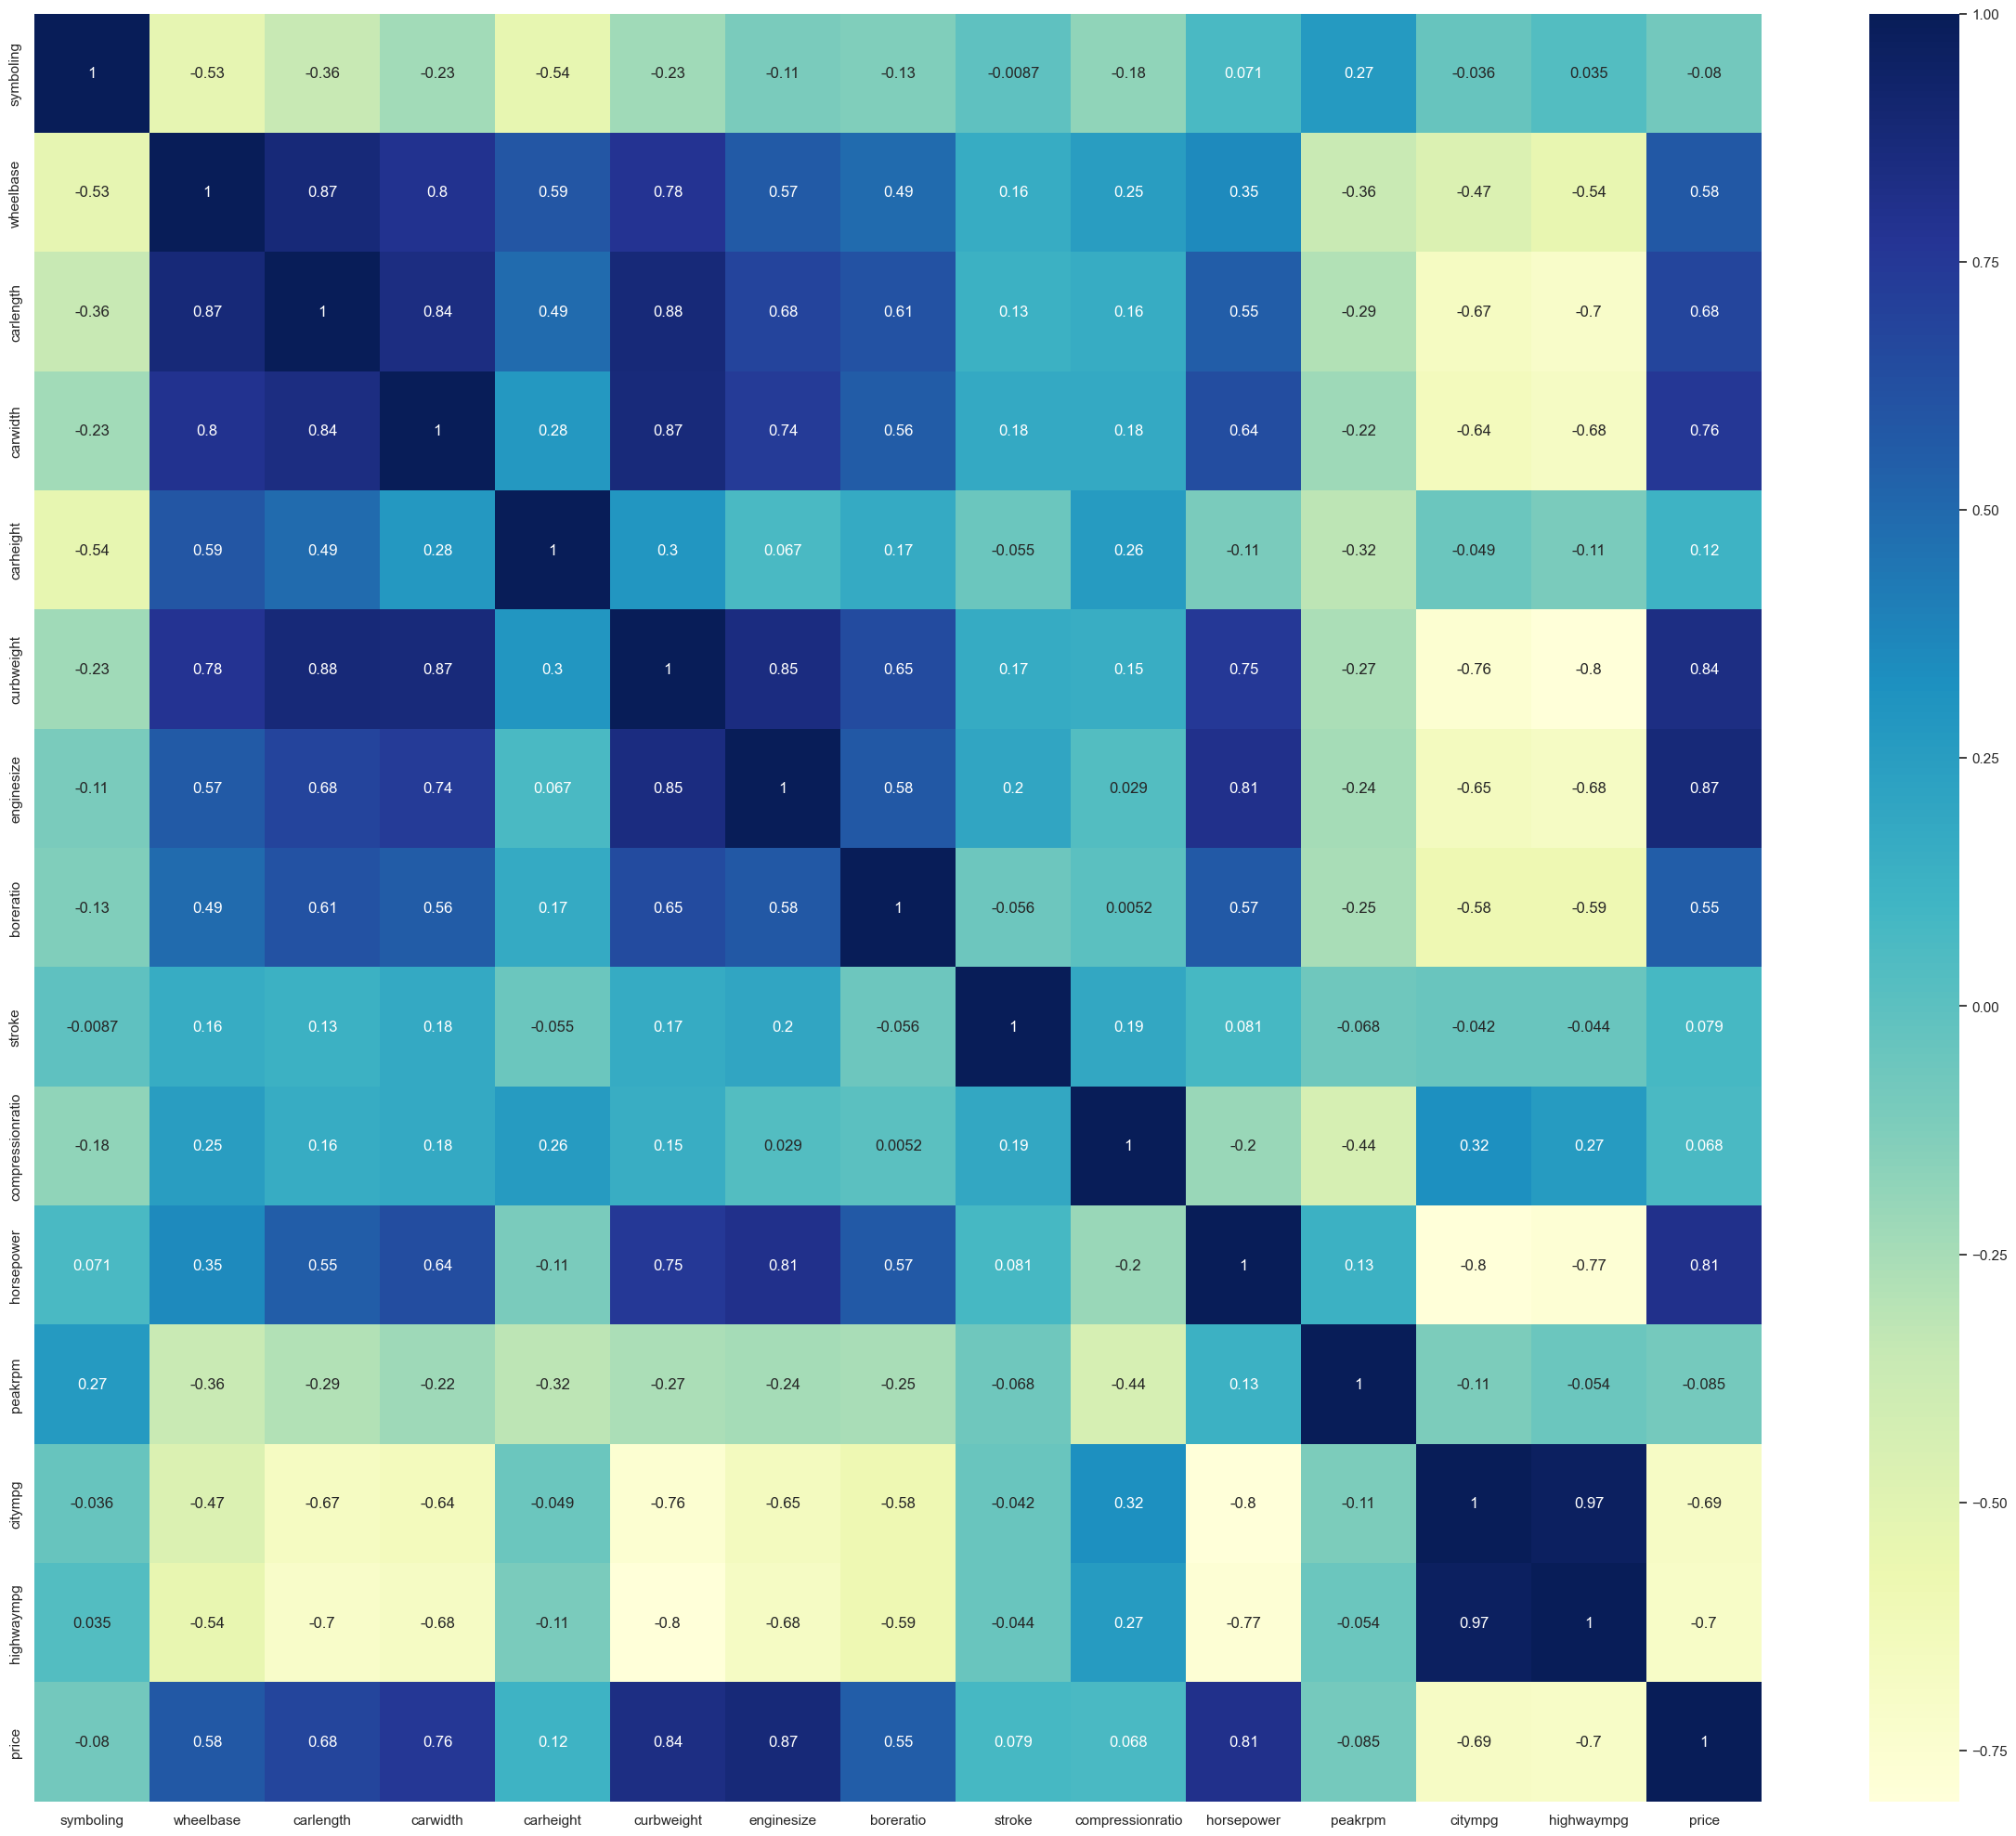

In [33]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

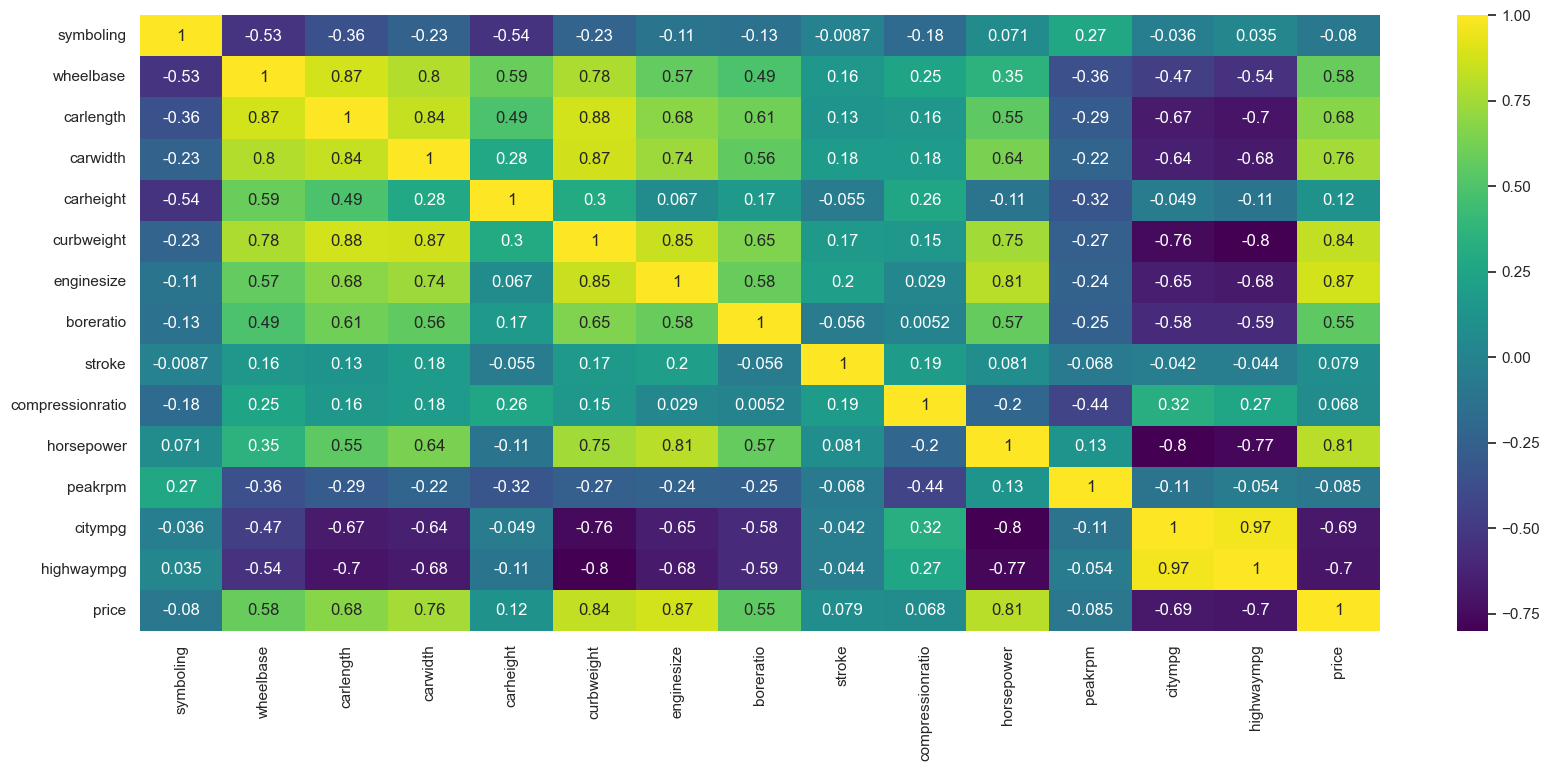

In [34]:
heatmap = sns.heatmap(df.corr(),cmap="viridis" ,annot = True)
fig = plt.gcf()
fig.set_size_inches(20, 8)

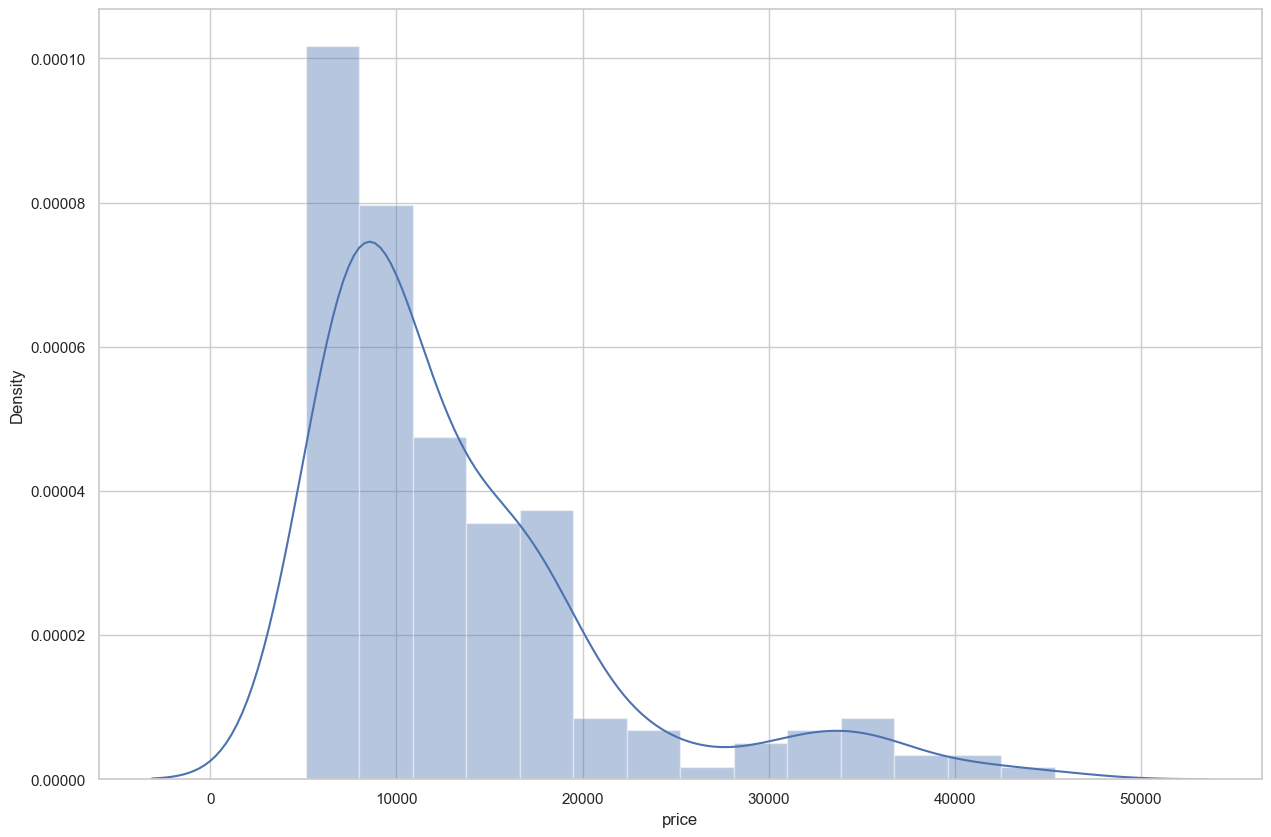

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

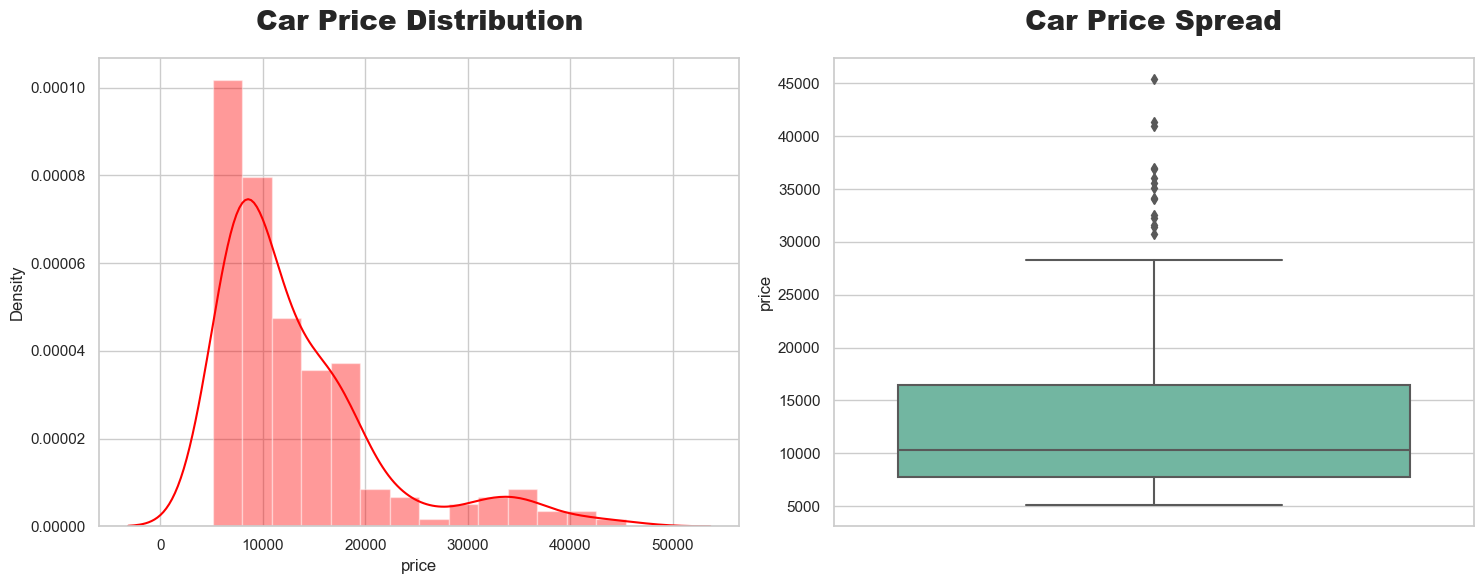

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [37]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min          mean   median      max          std      skew
price  5118.0  13276.710571  10295.0  45400.0  7988.852332  1.777678